In [48]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [49]:
# It's a good idea to ensure you're running the latest version of any libraries you need.
# `!pip install -Uqq <libraries>` upgrades to the latest version of <libraries>
# NB: You can safely ignore any warnings or errors pip spits out about running as root or incompatibilities
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai duckduckgo_search

from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [50]:
urls = search_images('monkey photos', max_images=3)
urls[0]

Searching for 'monkey photos'


'https://www.washingtonpost.com/resizer/oLrhvDHWXoe3ycLXTe0PAcZlejk=/960x0/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/AWN2OZ75JQYHZOBKZAQL5NROZU.jpg'

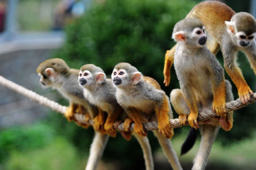

In [51]:
from fastdownload import download_url
dest = 'monkey.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

In [52]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')
bear_types


('grizzly', 'black', 'teddy')

In [55]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        print(f'bear type: {o}')
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images(f'{o} bear')
        download_images(urls=list(results), dest=dest)

In [56]:
fns = get_image_files(path)
fns
!ls bears
#!cd bears
!ls bears/grizzly
#!ls
#!rm -r bears
!ls


black  grizzly	teddy
0e6d24a5-fa90-4e87-a959-923ce0226807.jpg
0f7f3b19-1471-464a-b48f-1ddd13e90ae3.jpg
1171af0e-70ed-4856-a3bc-808fbb2191c7.jpg
17231dba-cdca-42b7-8e8a-3b4c99187735.jpg
1a7dd74a-6ba9-411b-b14d-52ad228e712b.jpg
1e3def62-073a-4482-a80d-a1ccccebe1d9.jpg
2e21cc9f-02ab-4308-9738-04c3c921612f.jpg
3e5d0176-21bf-4d1c-87cc-b4a7ea51112d.jpg
6cb43d0f-caab-4517-84e7-16675f81c5c2.jpg
6fbe2764-67b4-4134-81f5-7faf606477fb.jpg
73f836dd-a00e-4147-8002-ee3c95c92bb4.jpg
751082eb-8e7c-402d-8871-ad0f2edd1502.jpg
7cb71d06-71e0-4f22-92ce-7ce187d29372.jpg
7dec7a90-7ecd-46b3-b16a-82ae96a446ba.jpg
936148ee-7c62-4b2e-954d-c04bc1b9a5d5.jpg
99907a8c-aa41-4b9d-be38-019b41ef7baf.jpg
aa206c2c-8022-43b9-8a50-4a8ae83cb05f.jpg
b85eafab-31cf-4828-8d88-8bf383daff40.jpg
c3ac2db7-39c1-4162-8718-627eae3a6153.jpg
cc0f8486-1de7-43dc-a40a-0eb9e28d3422.jpg
d46d197d-f0d1-4fc4-af1f-fb197a340361.jpg
d6a540ed-db26-4f2d-b297-6dd15bd63a7f.jpg
dddc2ad5-e35a-43f4-8469-cd5191236a57.jpg
e3030019-d3f1-4ac0-a304-28a54cef0238

In [57]:
failed = verify_images(fns)
failed

(#0) []

In [58]:
failed.map(Path.unlink);
!ls bears/grizzly

0e6d24a5-fa90-4e87-a959-923ce0226807.jpg
0f7f3b19-1471-464a-b48f-1ddd13e90ae3.jpg
1171af0e-70ed-4856-a3bc-808fbb2191c7.jpg
17231dba-cdca-42b7-8e8a-3b4c99187735.jpg
1a7dd74a-6ba9-411b-b14d-52ad228e712b.jpg
1e3def62-073a-4482-a80d-a1ccccebe1d9.jpg
2e21cc9f-02ab-4308-9738-04c3c921612f.jpg
3e5d0176-21bf-4d1c-87cc-b4a7ea51112d.jpg
6cb43d0f-caab-4517-84e7-16675f81c5c2.jpg
6fbe2764-67b4-4134-81f5-7faf606477fb.jpg
73f836dd-a00e-4147-8002-ee3c95c92bb4.jpg
751082eb-8e7c-402d-8871-ad0f2edd1502.jpg
7cb71d06-71e0-4f22-92ce-7ce187d29372.jpg
7dec7a90-7ecd-46b3-b16a-82ae96a446ba.jpg
936148ee-7c62-4b2e-954d-c04bc1b9a5d5.jpg
99907a8c-aa41-4b9d-be38-019b41ef7baf.jpg
aa206c2c-8022-43b9-8a50-4a8ae83cb05f.jpg
b85eafab-31cf-4828-8d88-8bf383daff40.jpg
c3ac2db7-39c1-4162-8718-627eae3a6153.jpg
cc0f8486-1de7-43dc-a40a-0eb9e28d3422.jpg
d46d197d-f0d1-4fc4-af1f-fb197a340361.jpg
d6a540ed-db26-4f2d-b297-6dd15bd63a7f.jpg
dddc2ad5-e35a-43f4-8469-cd5191236a57.jpg
e3030019-d3f1-4ac0-a304-28a54cef0238.jpg
ea41d1a8-eb6d-47

In [59]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=20),
    get_y=parent_label,
    item_tfms=Resize(128))

In [61]:
dls = bears.dataloaders(path)

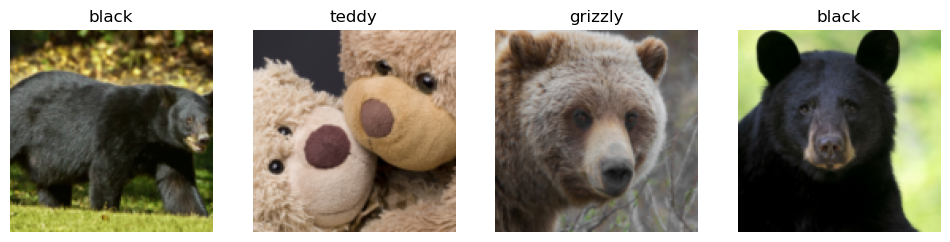

In [62]:
dls.valid.show_batch(max_n=4, nrows=1)


In [63]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [64]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.147265,2.463699,0.588235,00:20


epoch,train_loss,valid_loss,error_rate,time
0,1.938795,1.579383,0.411765,00:25
1,1.623607,0.490039,0.176471,00:25
2,1.251322,0.098459,0.058824,00:24
3,0.959772,0.034684,0.000000,00:24


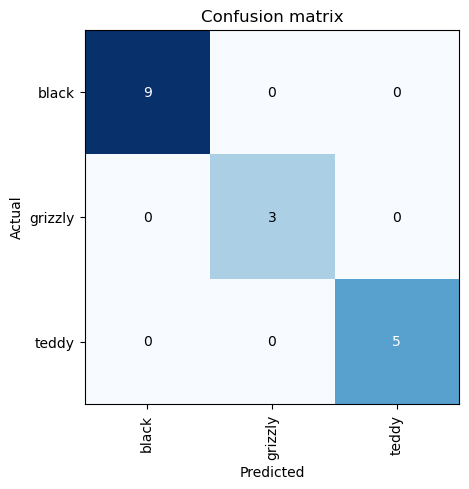

In [65]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

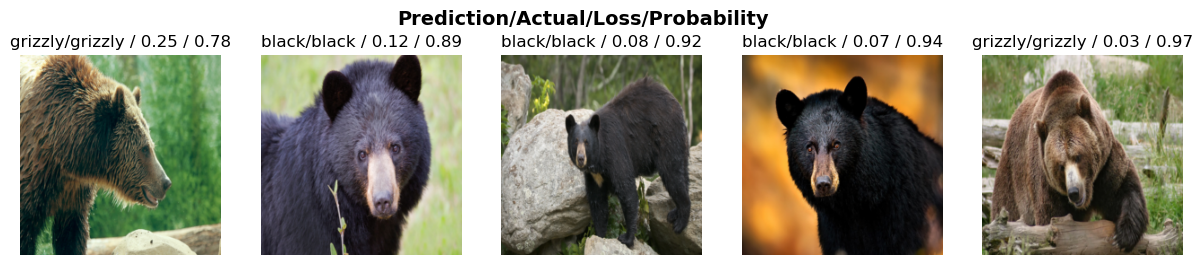

In [66]:
interp.plot_top_losses(5, nrows=1)


In [67]:
from fastai.vision.widgets import *
cleaner = ImageClassifierCleaner(learn)
cleaner

In [69]:
# delete selected for deletion
cleaner.delete()
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# move images for which we've selected a different category
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)
